In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

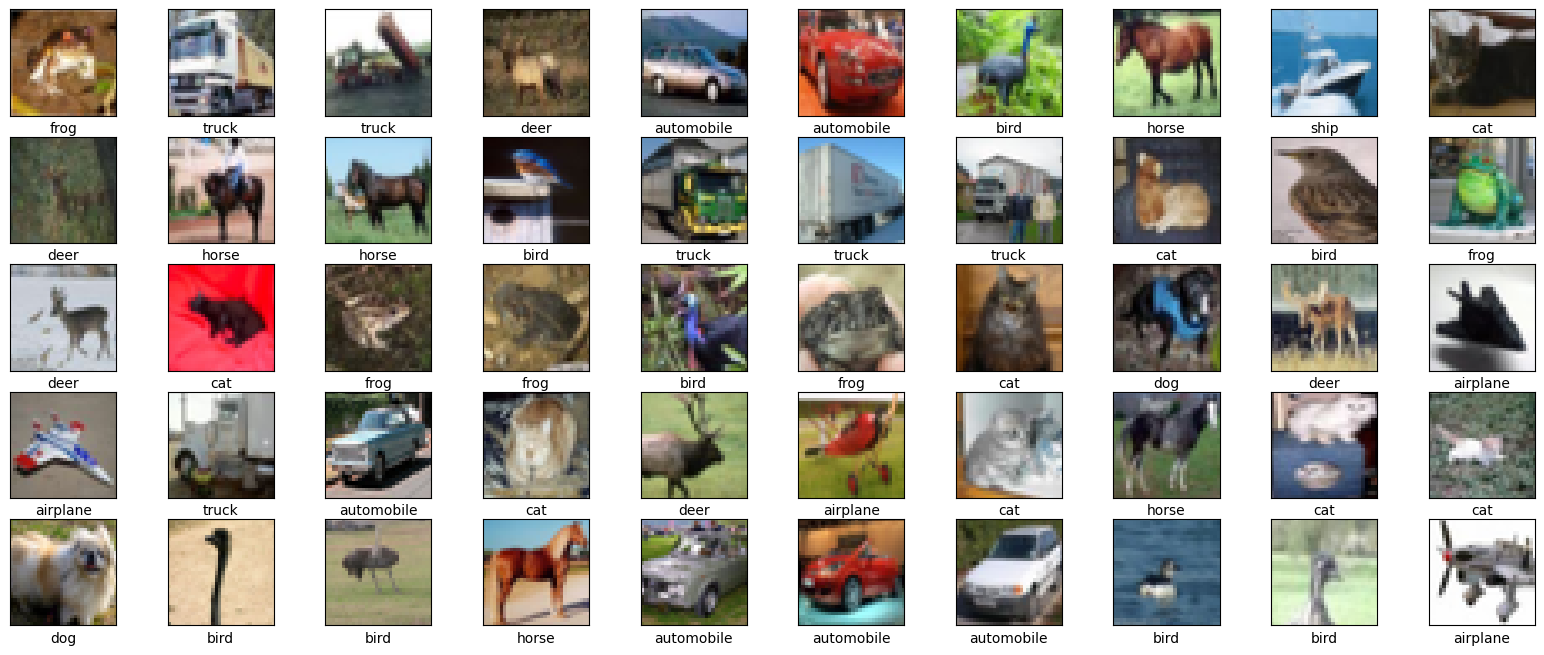

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train_processed, X_test_processed = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential()

# Convolutional Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                        

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_l1 = keras.Sequential()

# Convolutional Layers
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.3))

model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.3))

model_l1.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.3))

# Fully Connected Layers
model_l1.add(layers.Flatten())
model_l1.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Dropout(0.5))
model_l1.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                      

In [9]:
model_l1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model_l2 = keras.Sequential()

# Convolutional Layers
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.3))

model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.3))

model_l2.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.3))

# Fully Connected Layers
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Dropout(0.5))
model_l2.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                      

In [11]:
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
epochs = 20

In [13]:
model_processed = model
h = model.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/20
313/313 [==============================] - 24s 26ms/step - loss: 1.8656 - accuracy: 0.3809 - val_loss: 1.3210 - val_accuracy: 0.5222
Epoch 2/20
313/313 [==============================] - 7s 23ms/step - loss: 1.3059 - accuracy: 0.5425 - val_loss: 1.0613 - val_accuracy: 0.6142
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 1.0657 - accuracy: 0.6235 - val_loss: 1.0446 - val_accuracy: 0.6293
Epoch 4/20
313/313 [==============================] - 7s 24ms/step - loss: 0.9123 - accuracy: 0.6759 - val_loss: 0.7942 - val_accuracy: 0.7212
Epoch 5/20
313/313 [==============================] - 7s 23ms/step - loss: 0.8132 - accuracy: 0.7133 - val_loss: 0.7385 - val_accuracy: 0.7402
Epoch 6/20
313/313 [==============================] - 7s 23ms/step - loss: 0.7375 - accuracy: 0.7413 - val_loss: 0.8153 - val_accuracy: 0.7249
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 0.6850 - accuracy: 0.7616 - val_loss: 0.6626 - val_accuracy: 0.774

In [14]:
h_processed = model_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/20
313/313 [==============================] - 11s 29ms/step - loss: 0.3641 - accuracy: 0.8725 - val_loss: 3.9697 - val_accuracy: 0.1014
Epoch 2/20
313/313 [==============================] - 7s 24ms/step - loss: 0.3327 - accuracy: 0.8824 - val_loss: 3.7549 - val_accuracy: 0.1042
Epoch 3/20
313/313 [==============================] - 7s 24ms/step - loss: 0.3175 - accuracy: 0.8884 - val_loss: 0.8097 - val_accuracy: 0.7426
Epoch 4/20
313/313 [==============================] - 8s 24ms/step - loss: 0.3086 - accuracy: 0.8902 - val_loss: 0.5036 - val_accuracy: 0.8413
Epoch 5/20
313/313 [==============================] - 7s 24ms/step - loss: 0.2961 - accuracy: 0.8958 - val_loss: 0.5430 - val_accuracy: 0.8328
Epoch 6/20
313/313 [==============================] - 7s 24ms/step - loss: 0.2876 - accuracy: 0.8987 - val_loss: 0.5679 - val_accuracy: 0.8302
Epoch 7/20
313/313 [==============================] - 8s 25ms/step - loss: 0.2752 - accuracy: 0.9031 - val_loss: 0.5383 - val_accuracy: 0.838

In [15]:
model_l1_processed = model_l1
h1 = model_l1.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/20
313/313 [==============================] - 16s 27ms/step - loss: 39.7980 - accuracy: 0.3176 - val_loss: 6.6870 - val_accuracy: 0.1016
Epoch 2/20
313/313 [==============================] - 8s 24ms/step - loss: 4.6222 - accuracy: 0.3935 - val_loss: 4.6221 - val_accuracy: 0.1975
Epoch 3/20
313/313 [==============================] - 8s 25ms/step - loss: 3.9295 - accuracy: 0.4309 - val_loss: 4.1816 - val_accuracy: 0.3000
Epoch 4/20
313/313 [==============================] - 8s 24ms/step - loss: 3.5040 - accuracy: 0.4408 - val_loss: 3.5984 - val_accuracy: 0.3758
Epoch 5/20
313/313 [==============================] - 8s 24ms/step - loss: 3.4155 - accuracy: 0.4599 - val_loss: 3.5257 - val_accuracy: 0.3922
Epoch 6/20
313/313 [==============================] - 7s 24ms/step - loss: 3.3853 - accuracy: 0.4649 - val_loss: 4.1839 - val_accuracy: 0.2713
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 3.3392 - accuracy: 0.4696 - val_loss: 3.3345 - val_accuracy: 0.47

In [16]:
h1_processed = model_l1_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/20
313/313 [==============================] - 9s 26ms/step - loss: 3.0145 - accuracy: 0.5063 - val_loss: 4.6848 - val_accuracy: 0.0952
Epoch 2/20
313/313 [==============================] - 8s 25ms/step - loss: 2.9948 - accuracy: 0.5078 - val_loss: 4.1964 - val_accuracy: 0.1993
Epoch 3/20
313/313 [==============================] - 8s 24ms/step - loss: 3.0086 - accuracy: 0.5070 - val_loss: 3.4053 - val_accuracy: 0.3700
Epoch 4/20
313/313 [==============================] - 8s 24ms/step - loss: 3.0315 - accuracy: 0.5045 - val_loss: 3.1426 - val_accuracy: 0.4706
Epoch 5/20
313/313 [==============================] - 8s 25ms/step - loss: 2.9947 - accuracy: 0.5094 - val_loss: 3.1398 - val_accuracy: 0.4875
Epoch 6/20
313/313 [==============================] - 8s 24ms/step - loss: 2.9776 - accuracy: 0.5105 - val_loss: 2.9727 - val_accuracy: 0.4974
Epoch 7/20
313/313 [==============================] - 8s 25ms/step - loss: 2.9707 - accuracy: 0.5102 - val_loss: 3.3374 - val_accuracy: 0.3841

In [17]:
model_l2_processed = model_l2
h2 = model_l2.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/20
313/313 [==============================] - 14s 26ms/step - loss: 7.3557 - accuracy: 0.3819 - val_loss: 5.2413 - val_accuracy: 0.2117
Epoch 2/20
313/313 [==============================] - 7s 24ms/step - loss: 3.0449 - accuracy: 0.5725 - val_loss: 2.3948 - val_accuracy: 0.5237
Epoch 3/20
313/313 [==============================] - 7s 24ms/step - loss: 1.8453 - accuracy: 0.6574 - val_loss: 1.6785 - val_accuracy: 0.6626
Epoch 4/20
313/313 [==============================] - 8s 24ms/step - loss: 1.5463 - accuracy: 0.6875 - val_loss: 1.6016 - val_accuracy: 0.6516
Epoch 5/20
313/313 [==============================] - 8s 24ms/step - loss: 1.4607 - accuracy: 0.7046 - val_loss: 1.6497 - val_accuracy: 0.6234
Epoch 6/20
313/313 [==============================] - 8s 24ms/step - loss: 1.4355 - accuracy: 0.7096 - val_loss: 1.4939 - val_accuracy: 0.6825
Epoch 7/20
313/313 [==============================] - 8s 24ms/step - loss: 1.4207 - accuracy: 0.7211 - val_loss: 1.6155 - val_accuracy: 0.644

In [18]:
h2_processed = model_l2_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128)

Epoch 1/20
313/313 [==============================] - 9s 25ms/step - loss: 1.3739 - accuracy: 0.7443 - val_loss: 3.8268 - val_accuracy: 0.0952
Epoch 2/20
313/313 [==============================] - 8s 24ms/step - loss: 1.3422 - accuracy: 0.7492 - val_loss: 3.5125 - val_accuracy: 0.1082
Epoch 3/20
313/313 [==============================] - 8s 24ms/step - loss: 1.3411 - accuracy: 0.7524 - val_loss: 1.7057 - val_accuracy: 0.6322
Epoch 4/20
313/313 [==============================] - 7s 24ms/step - loss: 1.3242 - accuracy: 0.7569 - val_loss: 1.4412 - val_accuracy: 0.7195
Epoch 5/20
313/313 [==============================] - 8s 25ms/step - loss: 1.3164 - accuracy: 0.7566 - val_loss: 1.4611 - val_accuracy: 0.7017
Epoch 6/20
313/313 [==============================] - 8s 24ms/step - loss: 1.3151 - accuracy: 0.7527 - val_loss: 1.3347 - val_accuracy: 0.7489
Epoch 7/20
313/313 [==============================] - 8s 24ms/step - loss: 1.3069 - accuracy: 0.7562 - val_loss: 1.4251 - val_accuracy: 0.7054

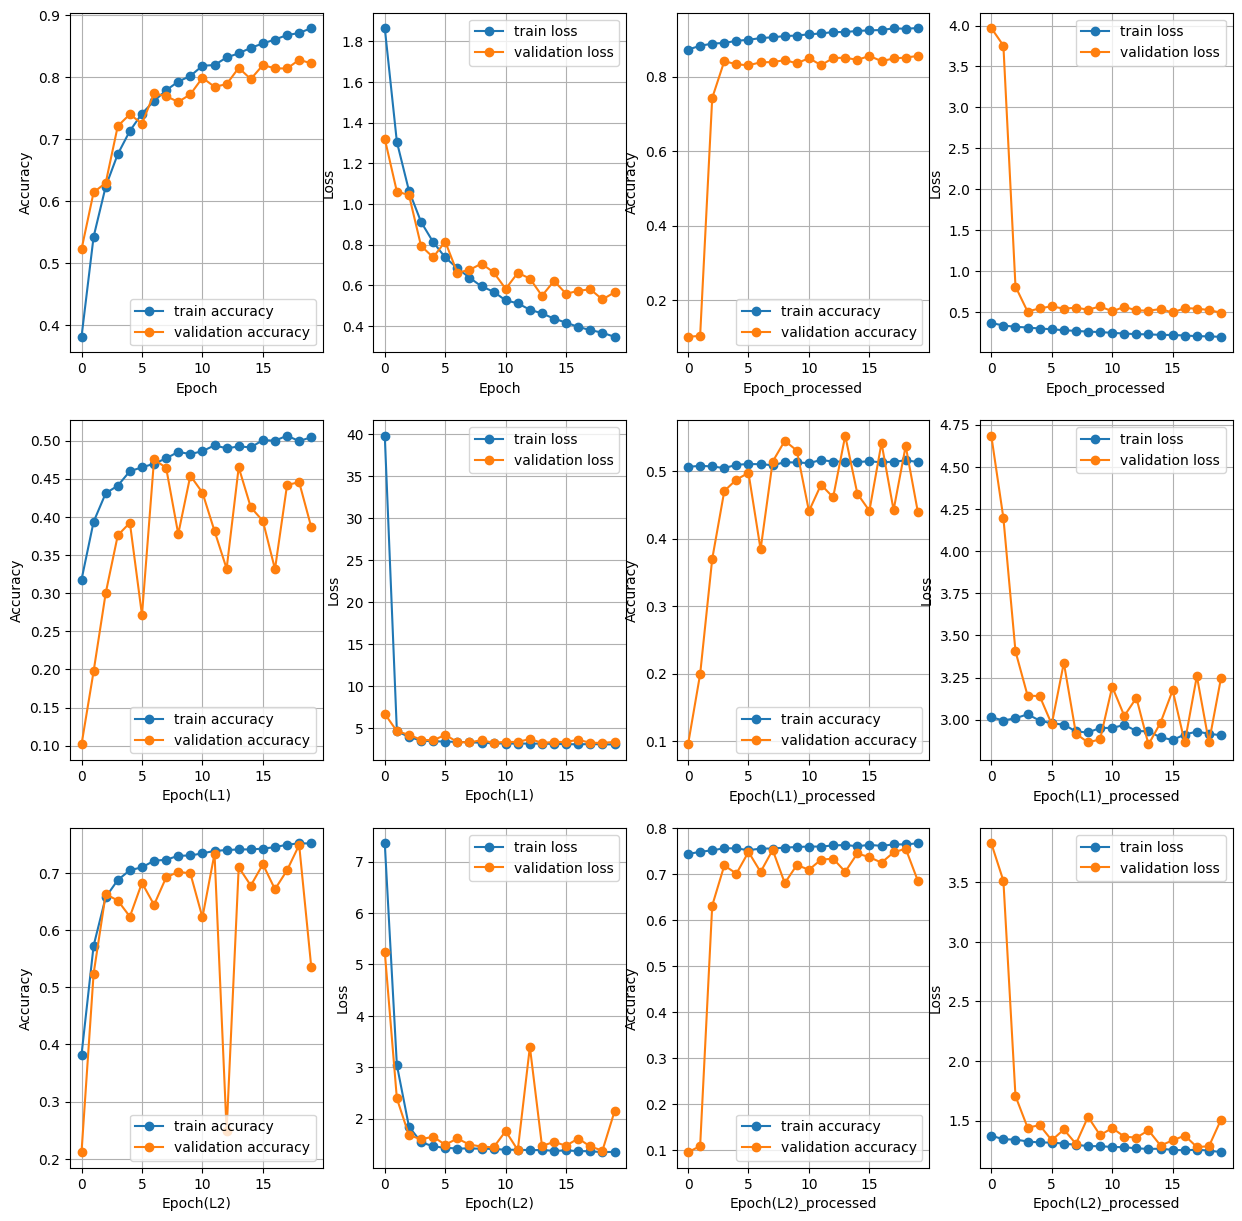

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(3,4,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,3)
plt.plot(h_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,4)
plt.plot(h_processed.history['loss'], 'o-', label='train loss')
plt.plot(h_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,5)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,6)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,7)
plt.plot(h1_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,8)
plt.plot(h1_processed.history['loss'], 'o-', label='train loss')
plt.plot(h1_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,9)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,10)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,11)
plt.plot(h2_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,12)
plt.plot(h2_processed.history['loss'], 'o-', label='train loss')
plt.plot(h2_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_acc, test_loss = model.evaluate(X_test, Y_test)
test_acc_processed, test_loss_processed = model_processed.evaluate(X_test_processed, Y_test)
test_acc_l1, test_loss_l1 = model_l1.evaluate(X_test, Y_test)
test_acc_l1_processed, test_loss_l1_processed = model_l1_processed.evaluate(X_test_processed, Y_test)
test_acc_l2, test_loss_l2 = model_l2.evaluate(X_test, Y_test)
test_acc_l2_processed, test_loss_l2_processed = model_l2_processed.evaluate(X_test_processed, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5173 - accuracy: 0.6893


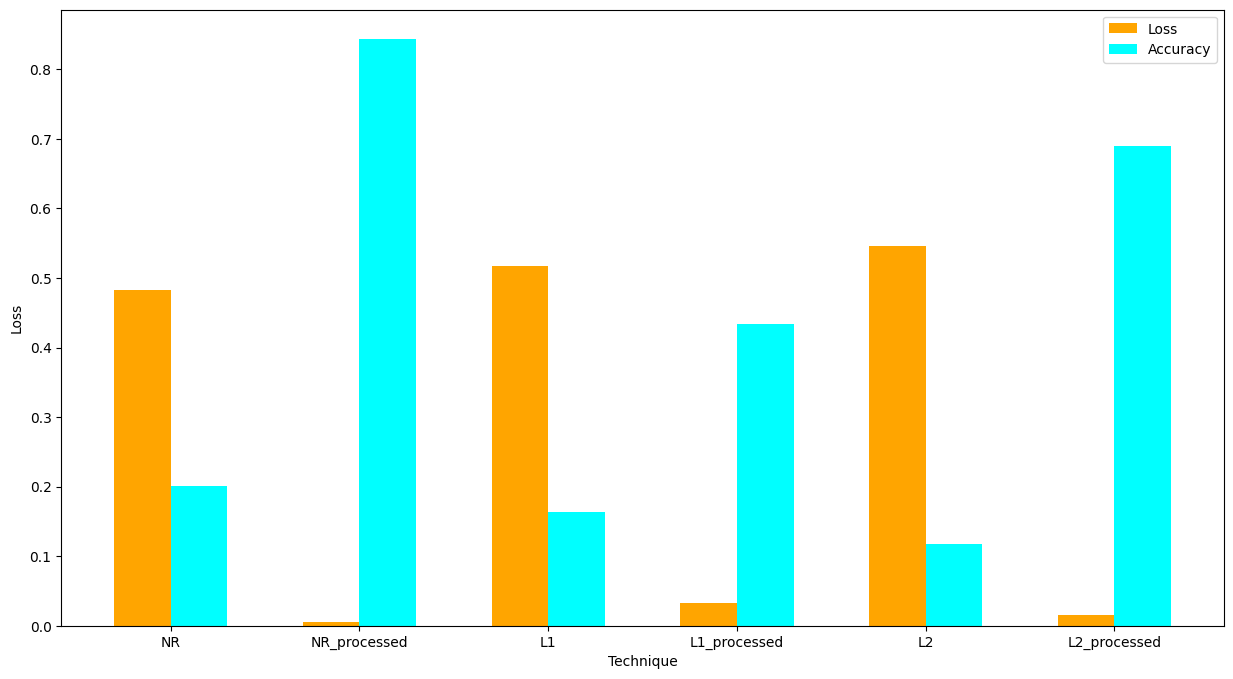

In [26]:
plt.figure(figsize=(15,8))

x = np.arange(6)
y1 = [test_loss, test_loss_processed, test_loss_l1, test_loss_l1_processed, test_loss_l2, test_loss_l2_processed]
y2 = [test_acc, test_acc_processed, test_acc_l1, test_acc_l1_processed, test_acc_l2, test_acc_l2_processed]
y2 = np.array(y2)/100.0
width = 0.3

# plot data in grouped manner of bar type
plt.plot()
plt.bar(x-0.15, y2, width, color='orange')
plt.bar(x+0.15, y1, width, color='cyan')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Loss")
plt.legend(["Loss", "Accuracy"])

plt.show()